In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
stocks_df=pd.read_csv("stock.csv")

In [3]:
stocks_df.sort_values(by="Date",inplace=True)

In [4]:
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [9]:
# function to calculate daily return
def daily_return(df):
    daily_return_df=df.copy()
    for i in df.columns[1:]:
        for j in range(1,len(df)):
            daily_return_df[i][j]=((df[i][j]-df[i][j-1])/df[i][j-1])*100
            daily_return_df[i][0]=0
    return daily_return_df

In [10]:
# get the daily returns
stocks_daily_return=daily_return(stocks_df)

In [11]:
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


In [12]:
stocks_daily_return.mean()

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

### Calculate BETA for a single stock

In [13]:
# select any stock, let's say Apple
stocks_daily_return["AAPL"]

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [16]:
# select the S&P500(Market)
stocks_daily_return["sp500"]

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

<AxesSubplot:xlabel='sp500', ylabel='AAPL'>

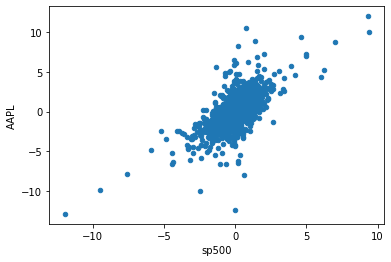

In [17]:
# plot the scatter plot between the selected stock & S&P500(Market)
stocks_daily_return.plot(kind="scatter",x="sp500",y="AAPL")

In [18]:
# fit a polynomial between the selected stock & the S&P500 (poly with order=1 is a straight line)
beta,alpha=np.polyfit(stocks_daily_return["sp500"],stocks_daily_return["AAPL"],1)

In [19]:
print("Beta for {} stock is {} and alpha is {} ".format("AAPL",beta,alpha))

Beta for AAPL stock is 1.1128924148678099 and alpha is 0.05281208469440287 


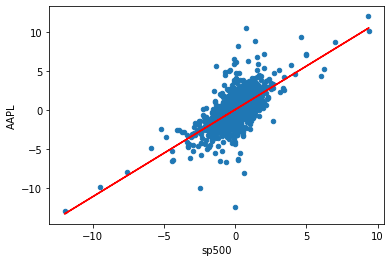

In [22]:
stocks_daily_return.plot(kind="scatter",x="sp500",y="AAPL")
plt.plot(stocks_daily_return["sp500"],beta*stocks_daily_return["sp500"]+alpha,"-",color="r")